<a href="https://colab.research.google.com/github/skaurl/tourbigdata/blob/master/%EC%8B%A0%ED%95%9C%EC%B9%B4%EB%93%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [138]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,7)

df20 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2020.txt", sep = "|", encoding = 'cp949')
df20 = df20[df20['gb3'] != "스포츠활동"]
df20 = df20[df20['gb3'] != "취미오락"]
df20['cln_age_r'] = df20['cln_age_r'].astype('object')
df20['ta_ym'] = df20['ta_ym'].astype('object')

df19 = pd.read_csv("/gdrive/My Drive/한양대학교/2020년 문화관광 빅데이터 분석대회/data/신한카드/신한카드 데이터/KCTI_NATIVE_2019.txt", sep = "|", encoding = 'cp949')
df19 = df19[df19['gb3'] != "스포츠활동"]
df19 = df19[df19['gb3'] != "취미오락"]
df19 = df19[df19['ta_ym'] != 201907]
df19 = df19[df19['ta_ym'] != 201908]
df19 = df19[df19['ta_ym'] != 201909]
df19 = df19[df19['ta_ym'] != 201910]
df19 = df19[df19['ta_ym'] != 201911]
df19 = df19[df19['ta_ym'] != 201912]
df19['cln_age_r'] = df19['cln_age_r'].astype('object')
df19['ta_ym'] = df19['ta_ym'].astype('object')

In [136]:
print(df20.dtypes)
print(df19.dtypes)

v1                 object
v2                 object
v3                 object
gb3                object
gb2                object
sex_ccd            object
cln_age_r          object
ta_ym              object
daw_ccd_r          object
apv_ts_dl_tm_r     object
vlm               float64
usec                int64
dtype: object
v1                 object
v2                 object
v3                 object
gb3                object
gb2                object
sex_ccd            object
cln_age_r          object
ta_ym              object
daw_ccd_r          object
apv_ts_dl_tm_r     object
vlm               float64
usec                int64
dtype: object


In [139]:
print("2020년 1월 ~ 6월 총 취급액",sum(df20['vlm']))
print("2019년 1월 ~ 6월 총 취급액",sum(df19['vlm']))

print("2020년 1월 ~ 6월 총 이용건수",sum(df20['usec']))
print("2019년 1월 ~ 6월 총 이용건수",sum(df19['usec']))

2020년 1월 ~ 6월 총 취급액 4760750868816.0
2019년 1월 ~ 6월 총 취급액 9116918962274.0
2020년 1월 ~ 6월 총 이용건수 110867924
2019년 1월 ~ 6월 총 이용건수 188533602


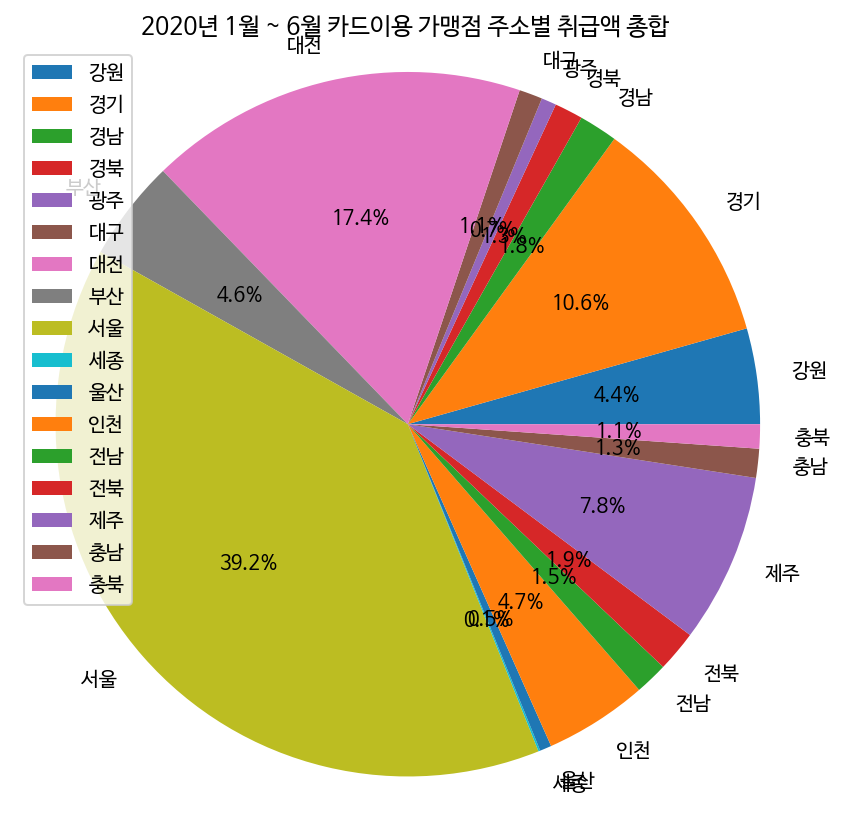

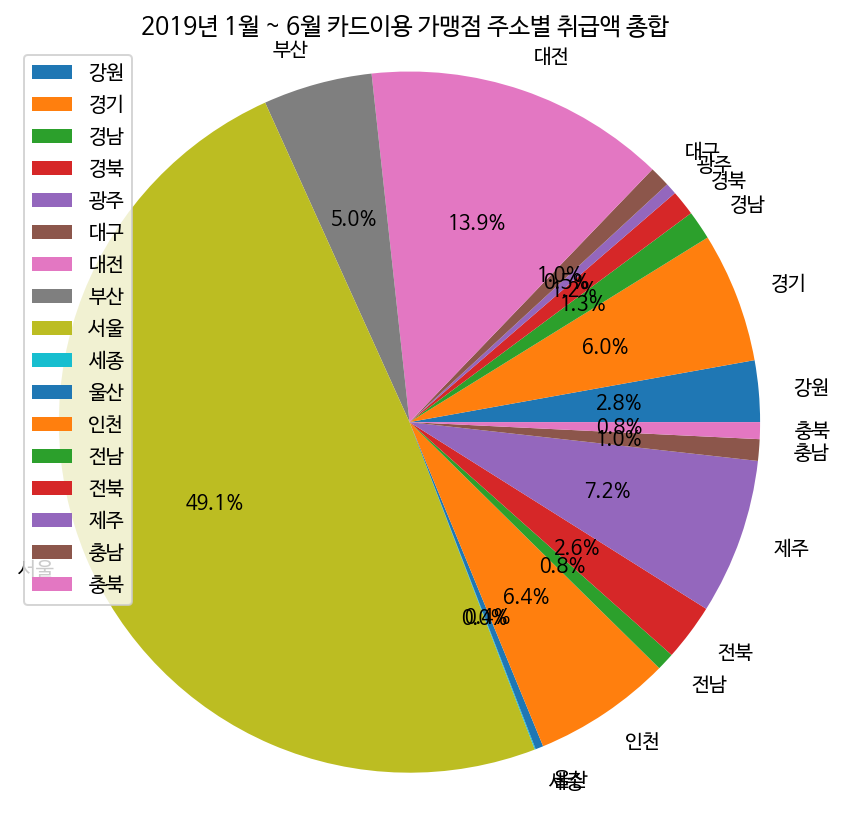

             vlm      usec           vlm      usec
v2                                                
강원  2.088541e+11   3887242  2.578574e+11   5045775
경기  5.066580e+11  18110930  5.466190e+11  17187571
경남  8.422145e+10   1802142  1.221045e+11   2666853
경북  6.201764e+10   1346139  1.064804e+11   2315470
광주  3.267432e+10    767603  4.831071e+10   1098594
대구  5.091446e+10    919076  8.706913e+10   1731969
대전  8.272670e+11  31338576  1.268203e+12  48601567
부산  2.206174e+11   3344217  4.583717e+11   5775693
서울  1.865310e+12  34516020  4.473029e+12  79216011
세종  3.951655e+09    116643  3.889260e+09    142132
울산  2.546486e+10    743573  3.320266e+10   1037064
인천  2.253617e+11   3300869  5.830075e+11   7542439
전남  7.152048e+10   1573157  7.490084e+10   1883152
전북  8.982499e+10   1387193  2.389830e+11   2509979
제주  3.699925e+11   4869373  6.538393e+11   7285221
충남  6.332128e+10   1485799  9.037880e+10   2273493
충북  5.277942e+10   1359372  7.067279e+10   2220619


In [140]:
v2 = df20.groupby(df20['v2']).sum()

categories = v2.index

plt.pie(v2.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

v2 = pd.concat([v2,df19.groupby(df19['v2']).sum()], axis=1)

categories = v2.index

plt.pie(v2.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 카드이용 가맹점 주소별 취급액 총합')
plt.legend(categories)
plt.show()

print(v2)

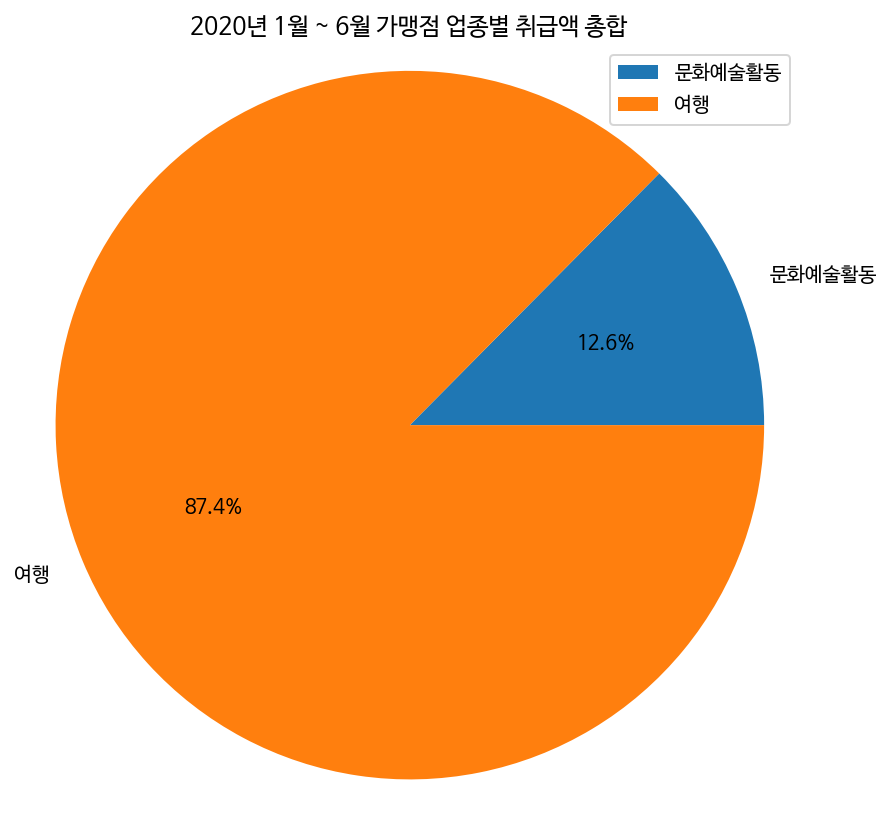

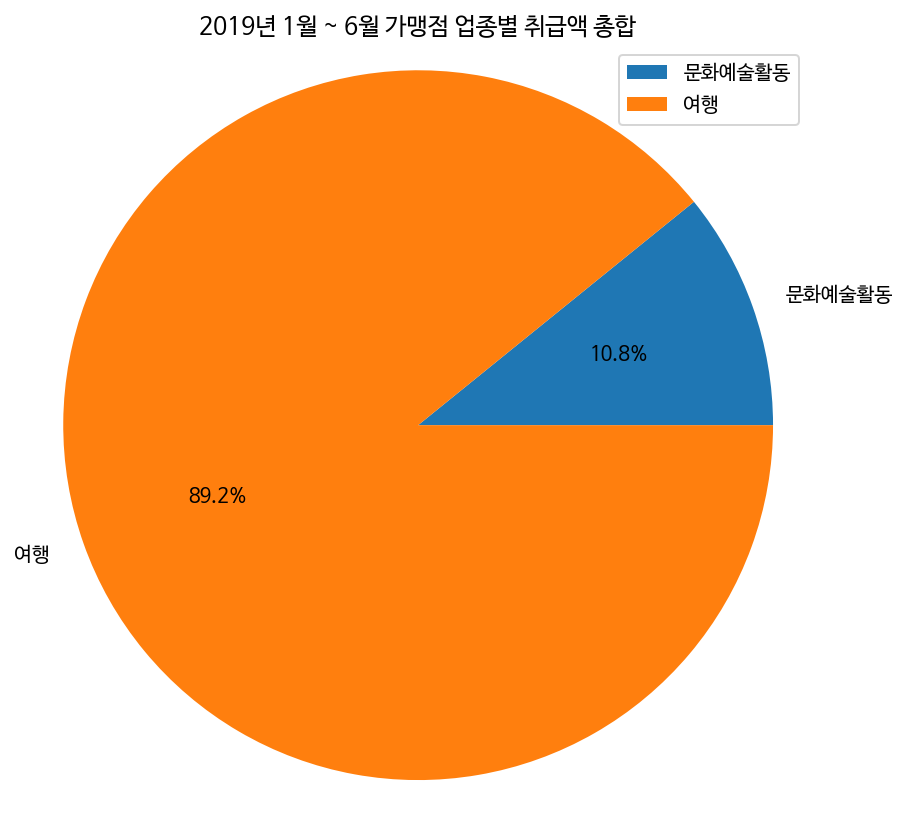

                 vlm      usec           vlm       usec
gb3                                                    
문화예술활동  5.986353e+11  21915791  9.877824e+11   49055956
여행      4.162116e+12  88952133  8.129137e+12  139477646


In [141]:
gb3 = df20.groupby(df20['gb3']).sum()

categories = gb3.index

plt.pie(gb3.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

gb3 = pd.concat([gb3,df19.groupby(df19['gb3']).sum()], axis=1)

categories = gb3.index

plt.pie(gb3.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 가맹점 업종별 취급액 총합')
plt.legend(categories)
plt.show()

print(gb3)

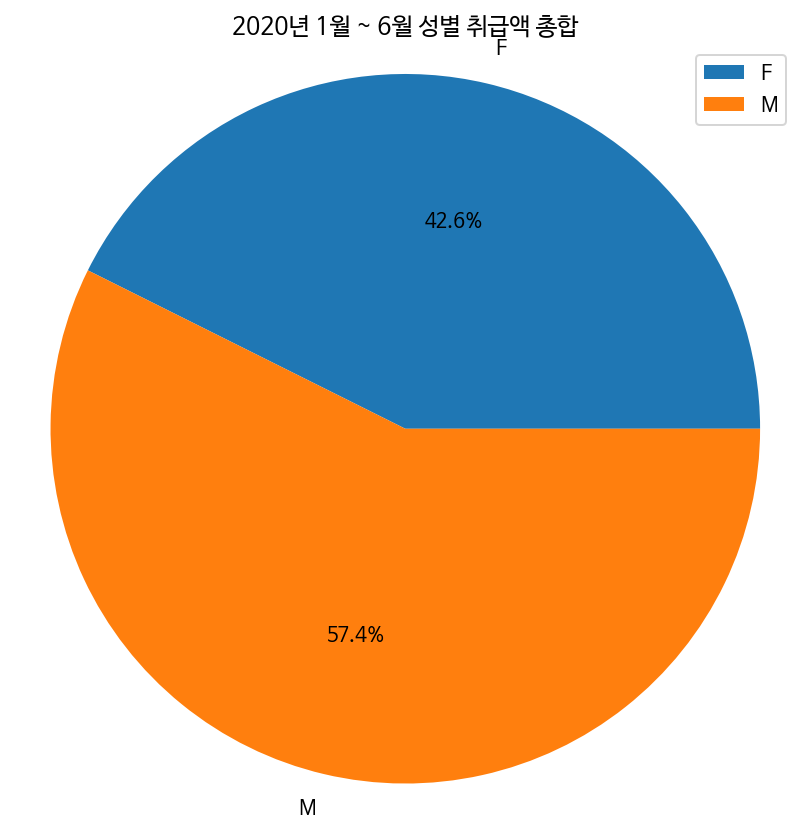

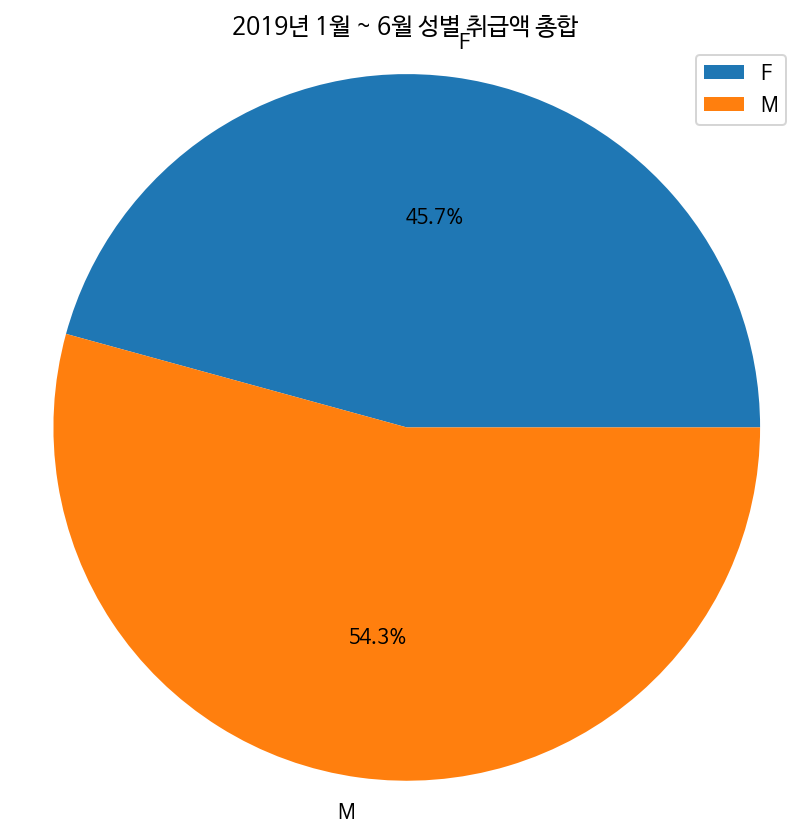

                  vlm      usec           vlm       usec
sex_ccd                                                 
F        2.029678e+12  49830080  4.169696e+12   87490507
M        2.731073e+12  61037844  4.947223e+12  101043095


In [142]:
sex_ccd = df20.groupby(df20['sex_ccd']).sum()

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

sex_ccd = pd.concat([sex_ccd,df19.groupby(df19['sex_ccd']).sum()], axis=1)

categories = sex_ccd.index

plt.pie(sex_ccd.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 성별 취급액 총합')
plt.legend(categories)
plt.show()

print(sex_ccd)

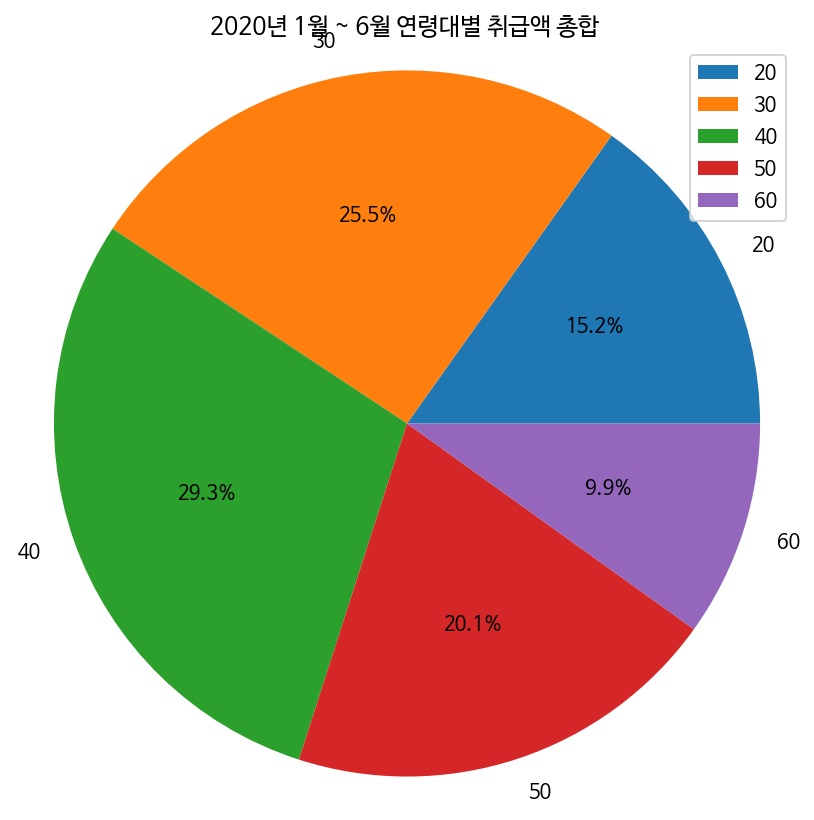

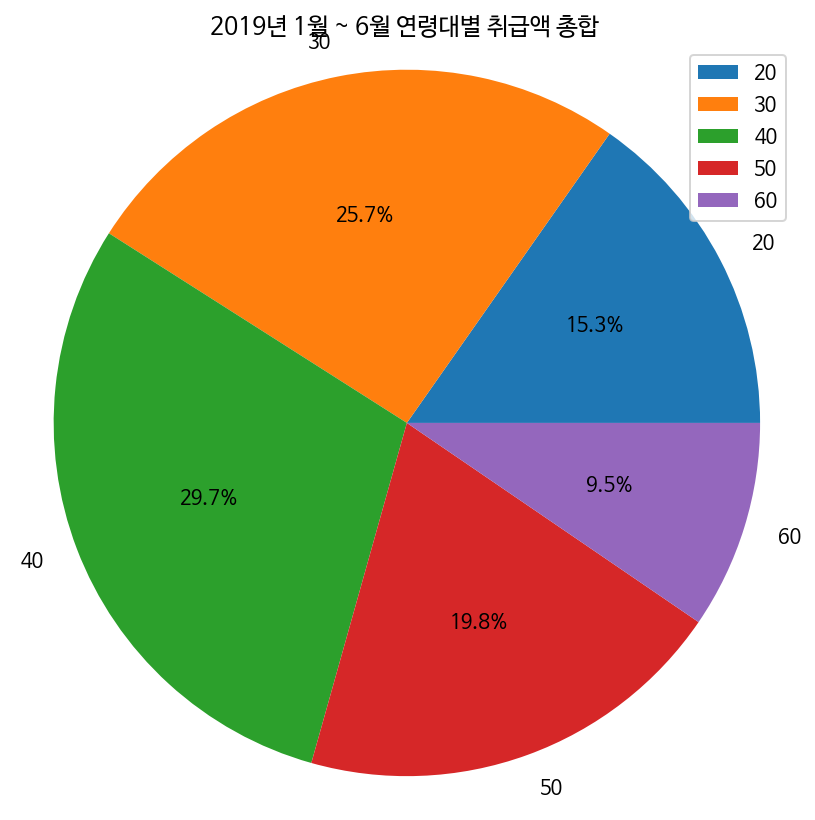

                    vlm        usec           vlm        usec
cln_age_r                                                    
20         2.394643e+13  1038904544  2.519720e+13  1160765580
30         4.031056e+13  1142265160  4.243074e+13  1188765184
40         4.633281e+13  1147802505  4.895082e+13  1191783843
50         3.165596e+13   802684802  3.271846e+13   797537509
60         1.563685e+13   405297056  1.573470e+13   380464594


In [123]:
cln_age_r = df20.groupby(df20['cln_age_r']).sum()

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

cln_age_r = pd.concat([cln_age_r,df19.groupby(df19['cln_age_r']).sum()], axis=1)

categories = cln_age_r.index

plt.pie(cln_age_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 연령대별 취급액 총합')
plt.legend(categories)
plt.show()

print(cln_age_r)

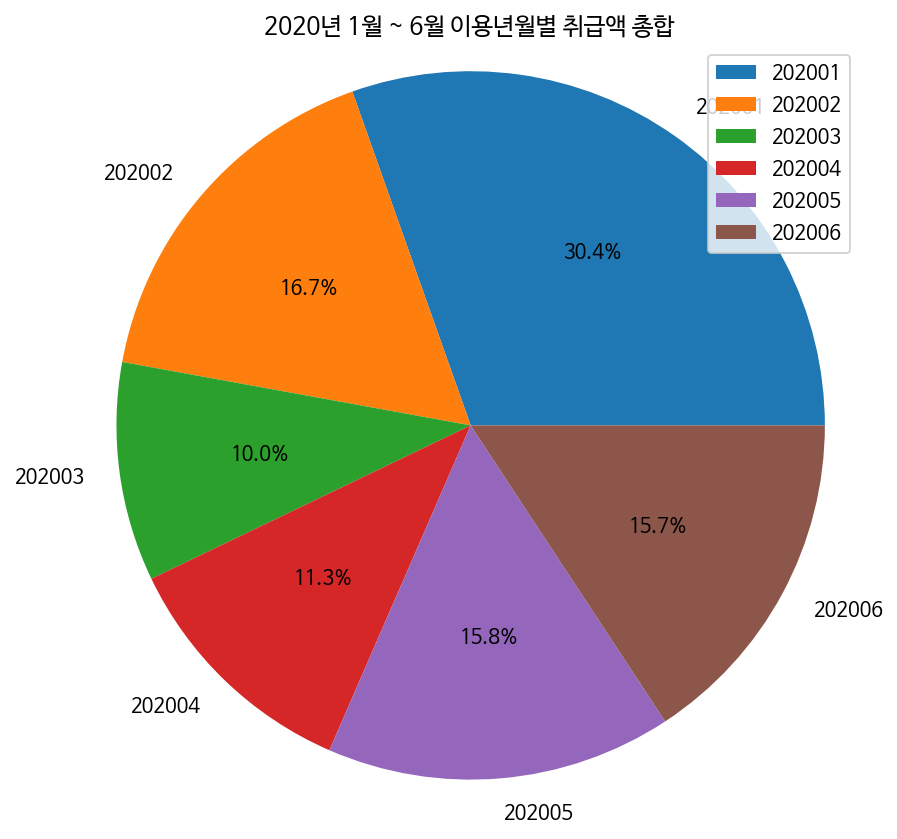

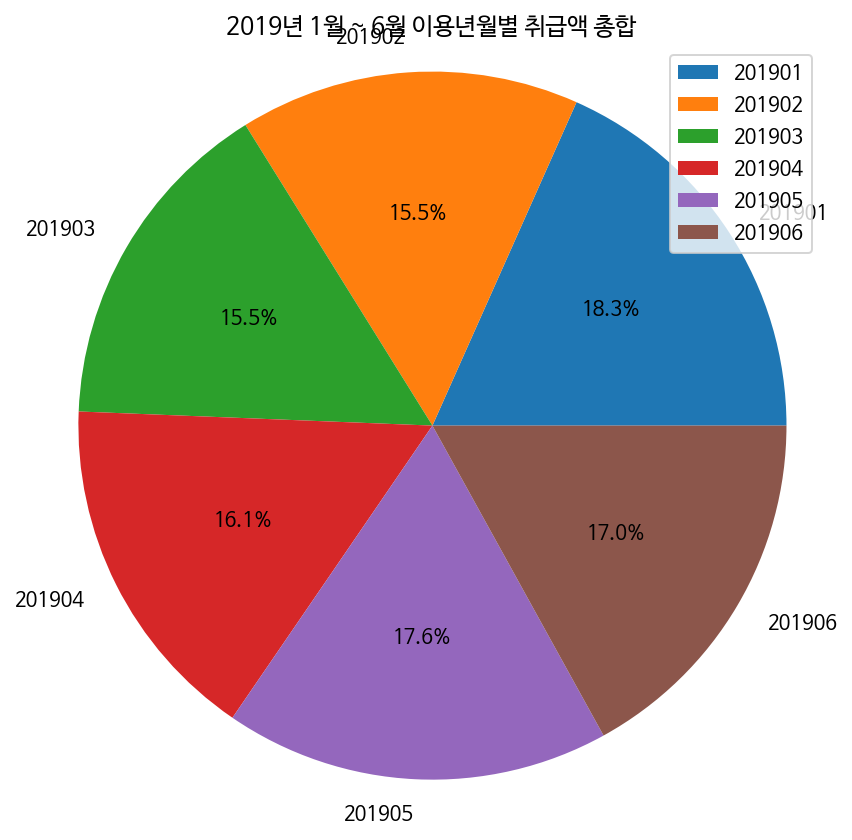

ta_ym
201901    1.671062e+12
201902    1.415804e+12
201903    1.413675e+12
201904    1.466094e+12
201905    1.603153e+12
201906    1.547131e+12
202001    1.448278e+12
202002    7.956085e+11
202003    4.758509e+11
202004    5.399664e+11
202005    7.514031e+11
202006    7.496444e+11
Name: vlm, dtype: float64


In [148]:
ta_ym = df20.groupby(df20['ta_ym']).sum()

categories = ta_ym.index

plt.pie(ta_ym.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 이용년월별 취급액 총합')
plt.legend(categories)
plt.show()

ta_ym = df19.groupby(df19['ta_ym']).sum()

categories = ta_ym.index

plt.pie(ta_ym.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 이용년월별 취급액 총합')
plt.legend(categories)
plt.show()

ta_ym = pd.concat([ta_ym,df20.groupby(df20['ta_ym']).sum()],axis=0)

print(ta_ym.iloc[:,0])

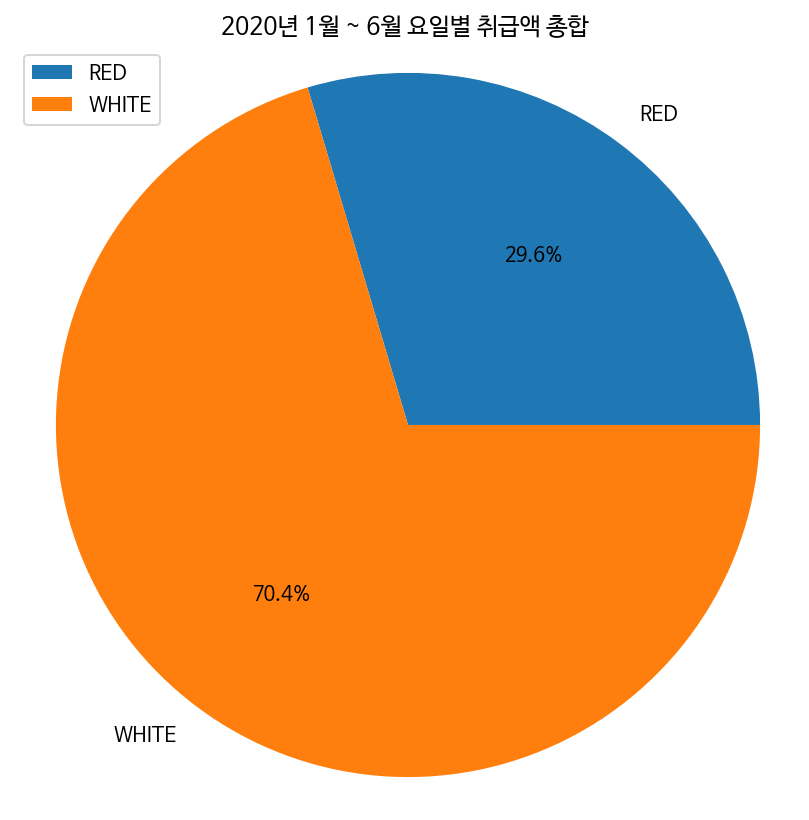

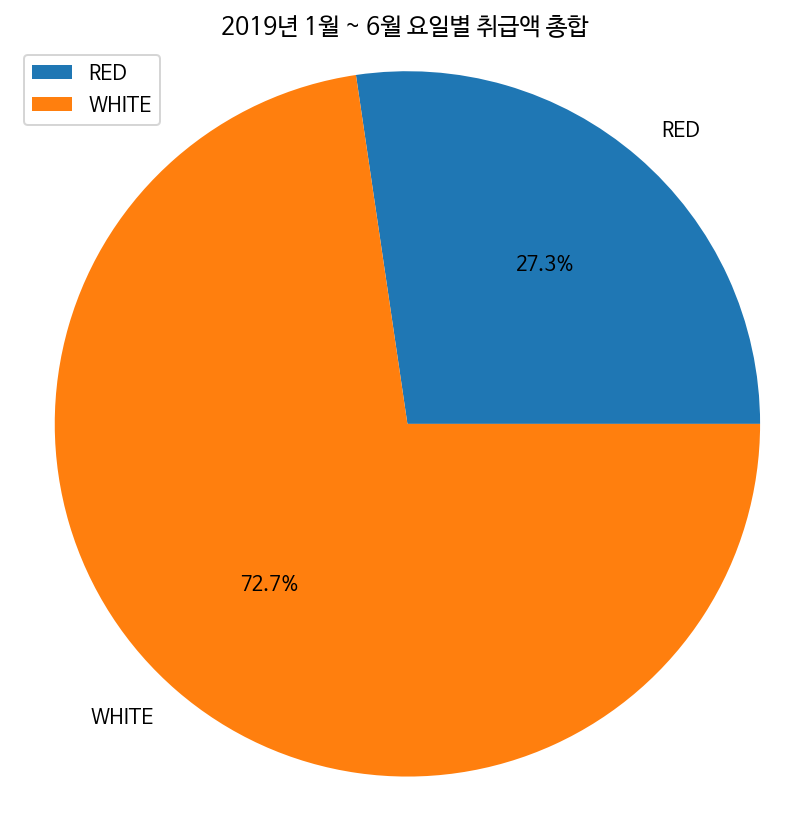

                    vlm      usec           vlm       usec
daw_ccd_r                                                 
RED        1.409289e+12  36828851  2.491824e+12   66536113
WHITE      3.351462e+12  74039073  6.625095e+12  121997489


In [149]:
daw_ccd_r = df20.groupby(df20['daw_ccd_r']).sum()

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

daw_ccd_r = pd.concat([daw_ccd_r,df19.groupby(df19['daw_ccd_r']).sum()], axis=1)

categories = daw_ccd_r.index

plt.pie(daw_ccd_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

print(daw_ccd_r)

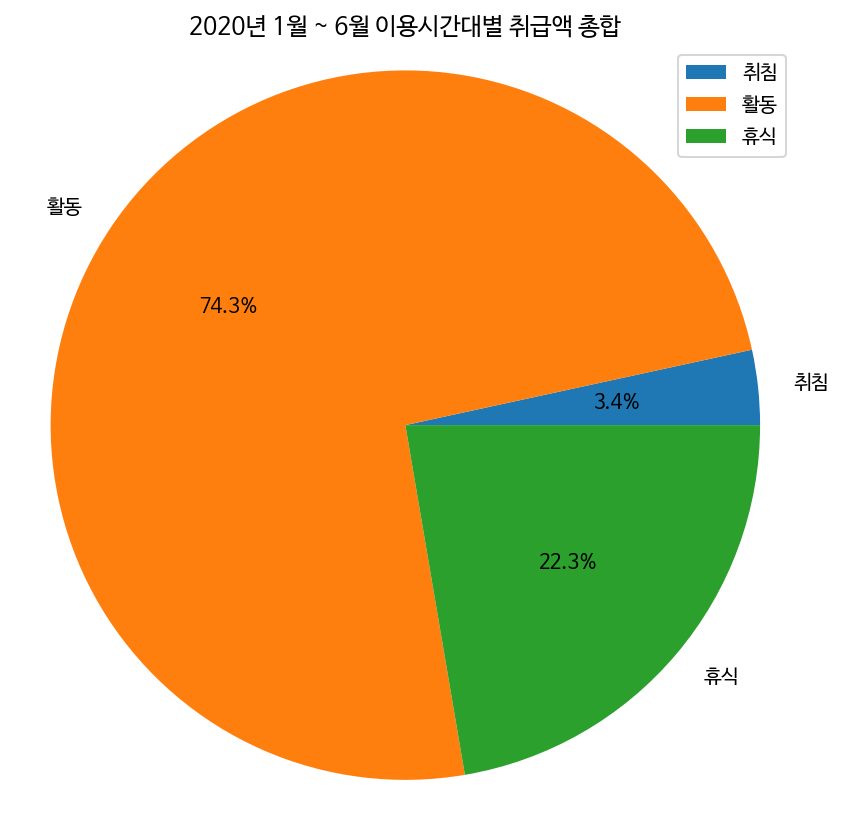

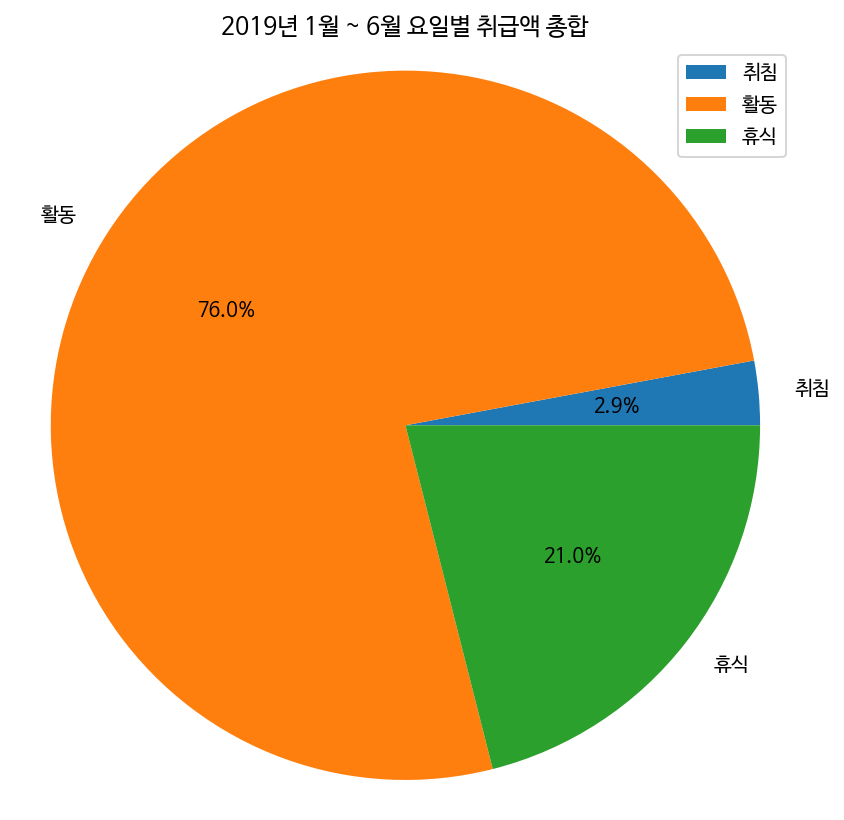

                         vlm      usec           vlm       usec
apv_ts_dl_tm_r                                                 
취침              1.623742e+11   4051440  2.666684e+11    6357102
활동              3.535961e+12  79023507  6.932055e+12  131644499
휴식              1.062415e+12  27792977  1.918196e+12   50532001


In [150]:
apv_ts_dl_tm_r = df20.groupby(df20['apv_ts_dl_tm_r']).sum()

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,0], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2020년 1월 ~ 6월 이용시간대별 취급액 총합')
plt.legend(categories)
plt.show()

apv_ts_dl_tm_r = pd.concat([apv_ts_dl_tm_r,df19.groupby(df19['apv_ts_dl_tm_r']).sum()], axis=1)

categories = apv_ts_dl_tm_r.index

plt.pie(apv_ts_dl_tm_r.iloc[:,2], labels=categories, autopct='%0.1f%%')
plt.axis('equal')
plt.title('2019년 1월 ~ 6월 요일별 취급액 총합')
plt.legend(categories)
plt.show()

print(apv_ts_dl_tm_r)

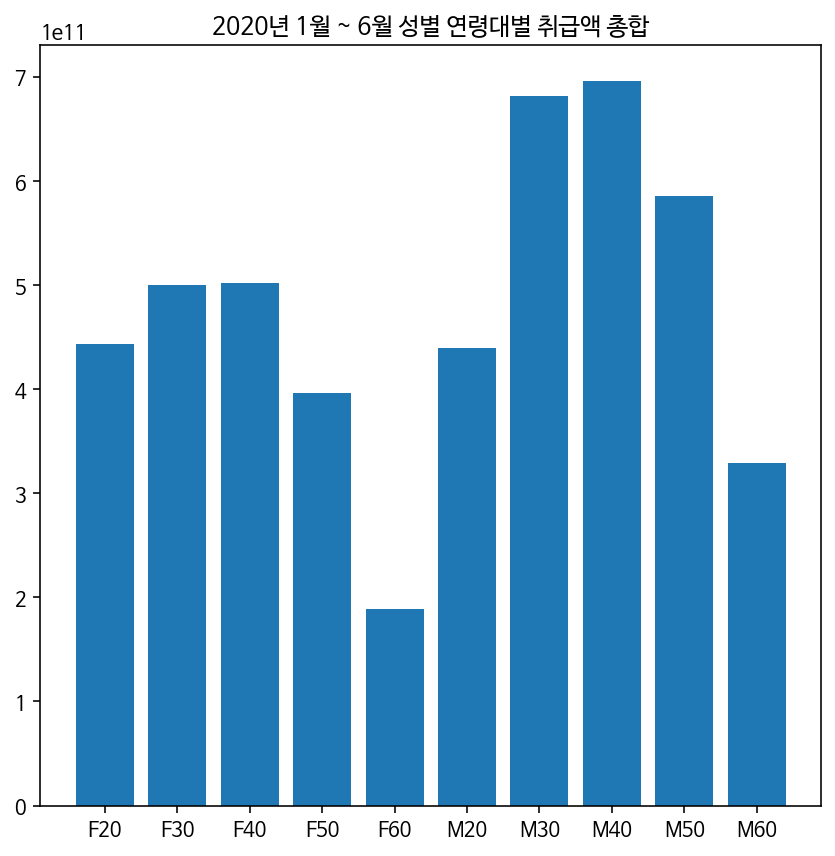

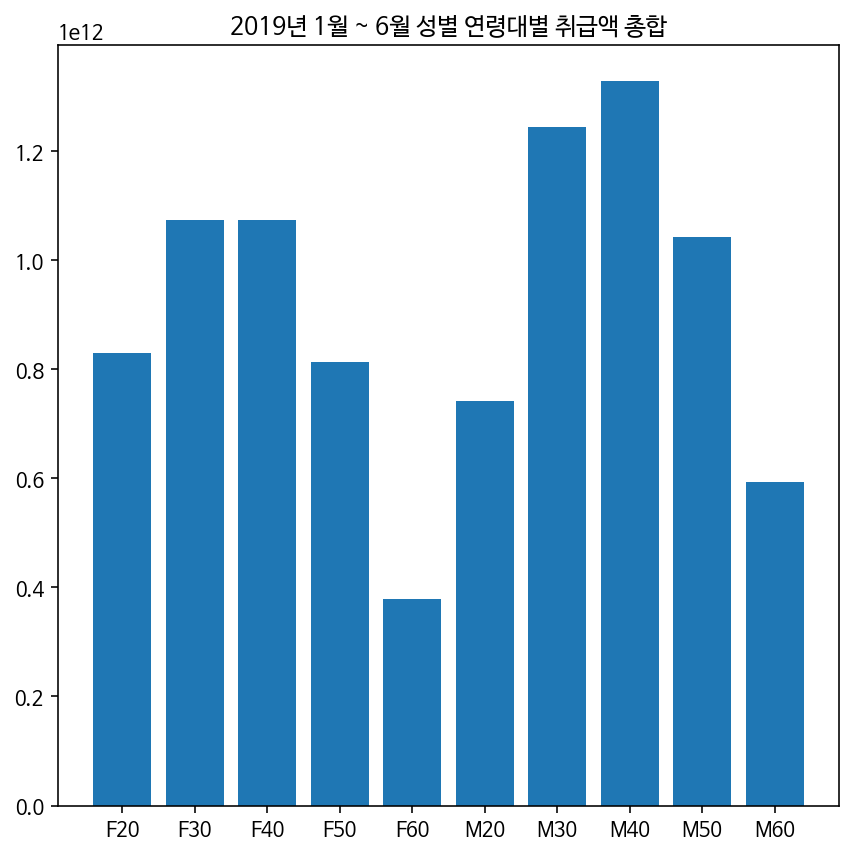

                            vlm      usec           vlm      usec
sex_ccd cln_age_r                                                
F       20         4.429824e+11  16562869  8.300485e+11  27820360
        30         4.995734e+11  11182824  1.073763e+12  20557761
        40         5.021533e+11  10399567  1.073133e+12  19403974
        50         3.958117e+11   8157314  8.135958e+11  13989308
        60         1.891570e+11   3527506  3.791560e+11   5719104
M       20         4.392841e+11  15846270  7.407745e+11  27279513
        30         6.811068e+11  14561244  1.244234e+12  24544493
        40         6.960165e+11  13529511  1.328329e+12  23393646
        50         5.858329e+11  11172662  1.041535e+12  17100525
        60         3.288328e+11   5928157  5.923501e+11   8724918


In [151]:
sex_ccd_cln_age_r = df20.groupby([df20['sex_ccd'],df20['cln_age_r']]).sum()

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,0])
plt.title('2020년 1월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

sex_ccd_cln_age_r = pd.concat([sex_ccd_cln_age_r,df19.groupby([df19['sex_ccd'],df19['cln_age_r']]).sum()], axis=1)

categories = sex_ccd_cln_age_r.index
categories = [i[0]+str(i[1]) for i in categories]

plt.bar(categories, sex_ccd_cln_age_r.iloc[:,2])
plt.title('2019년 1월 ~ 6월 성별 연령대별 취급액 총합')
plt.show()

print(sex_ccd_cln_age_r)